In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import io_mesh as io
from scipy import stats
import subprocess
import os

/home/users/kwagstyl/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/users/kwagstyl/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/users/kwagstyl/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
v1_dist={}
for hemi in ['left','right']:
    v1_dist[hemi]=np.loadtxt('../../../Hierarchy/geodesics/visual_geodesic_distances_{}.txt'.format(hemi))


In [4]:
all_slices="1066 2807 3300 3863 4366 4892 5431 0301 1066v1 1582 1600 4080 3380 5431a 6316".split(' ')
round2_slices="1582 1600 4080 3380 5431a 6316".split(' ')
v1_slices="0301 1066v1".split(' ')

coords_all_slices=np.zeros((len(all_slices),6))
for k,section in enumerate(all_slices):
    #get section dir
    if section in v1_slices:
        slice_dir="../../TrainingData/V1/Slice_{}/".format(section[:4])
    elif section in round2_slices:
        slice_dir="../../TrainingData/new_sections_03-18/Slice_{}/".format(section[:4])
    else:
        slice_dir="../../TrainingData/Slice_{}/".format(section[:4])
    maskfile= os.path.join(slice_dir,'pm{}Mask_nl_aligned.mnc'.format(section[:4]))
    subprocess.call('minc_modify_header -dinsert yspace:step=1 {}'.format(maskfile),shell=True)
    for hemi in ['left','right']:
        txtfile=os.path.join(slice_dir,'masks_{}_{}.txt'.format(hemi,section[:4]))
        subprocess.call('volume_object_evaluate -nearest_neighbour {} ../../surfdir/mid_{}_327680.obj {}'.format(maskfile,
                                                                                                            hemi,
                                                                                                            txtfile),
                       shell=True)
        vals = np.loadtxt(txtfile).astype(int)
        for val in np.unique(vals):
            if val>0:
                coords_all_slices[k,val-1]=np.mean(v1_dist[hemi][:163842][vals==val])
                print(section,np.mean(v1_dist[hemi][:163842][vals==val]))

1066 36.879952894736846
1066 39.52959673684211
1066 18.841783999999997
1066 17.066885630136984
2807 105.71566933333334
2807 68.12064502040816
2807 97.41760372413793
2807 113.47872486567165
2807 110.49838951666668
2807 83.71592482608696
3300 150.95683928571427
3300 104.623837375
3300 120.95186155555555
3300 151.07897903703704
3300 150.575943
3300 72.22125404761906
3863 163.42130342857146
3863 166.77075163333336
3863 165.572731
3863 148.7379732608696
3863 177.84250257142858
3863 140.07927234285714
3863 123.46328582051284
4366 181.82187349999998
4366 126.23693408888887
4366 142.64486479166666
4366 154.1996328611111
4366 142.56882590243902
4366 104.66163338461539
4892 164.2094517142857
4892 135.9319728214286
4892 94.12439093877549
4892 152.13812919047618
4892 161.38749051612905
4892 102.5457946875
5431 193.9598687222222
5431 111.54140699999999
5431 128.44071459999998
5431 98.4192648275862
5431 100.14108545000002
5431 190.11350221052635
0301 1.0291921807228916
0301 0.23909665624999998
1066v

In [5]:
v=np.array([1,2,3,4,1,2,3,3])
i=np.array([1,3,4,1,2,3,3,5])

In [6]:
coords_all_slices[v,i]

array([ 68.12064502, 151.07897904, 140.07927234, 126.23693409,
        97.41760372, 151.07897904, 148.73797326, 123.46328582])

In [7]:
np.savetxt('../../TrainingData/TrainingData/section_coords_geodesic.txt',coords_all_slices)

In [8]:
surf_left=io.load_mesh_geometry('../../white_left_up.obj')
surf_right=io.load_mesh_geometry('../../white_right_up.obj')

In [9]:
profiles_left=np.loadtxt('../../BigBrainData/geo_left_20.txt')

In [10]:
profiles_right=np.loadtxt('../../BigBrainData/geo_right_20.txt')

In [18]:
left_mean=np.mean(profiles_left,axis=1)
right_mean=np.mean(profiles_right,axis=1)

In [40]:
profiles_left_corr =profiles_left - np.expand_dims(-11.34*v1_dist['left'],1)

In [23]:
slope, intercept, r_value, p_value, std_err = stats.linregress(surf_left['coords'][:,1], left_mean)
print(slope,std_err)


-31.860567419561164 0.0800055399335417


In [26]:
slope, intercept, r_value, p_value, std_err = stats.linregress(surf_left['coords'][:,1], left_mean)
print(slope,std_err)


-31.860567419561164 0.0800055399335417


In [30]:
slope, intercept, r_value, p_value, std_err = stats.linregress(v1_dist['left'], corr_left_mean)
print(slope,std_err)


0.5925477521672686 0.0613592171075345


In [28]:
slope, intercept, r_value, p_value, std_err = stats.linregress(v1_dist['right'], right_mean)
print(slope,std_err)

-11.930149396116487 0.06088960763250956


In [34]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.hstack((v1_dist['right'],v1_dist['left'])), np.hstack((right_mean,left_mean)))
print(slope,std_err)

-11.33828332849133 0.043220064705889925


In [36]:
corr_left_mean = left_mean - slope*v1_dist['left']
#plt.scatter(v1_dist['left'], corr_left_mean)
#plt.scatter(v1_dist['left'], left_mean)

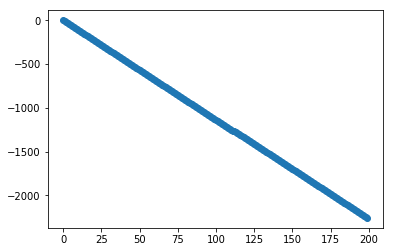

In [38]:
plt.scatter(np.arange(200),slope*np.arange(200))

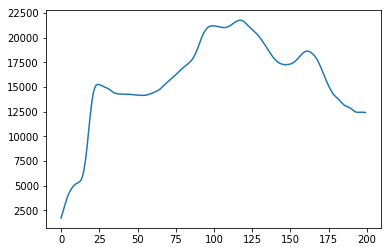

In [28]:
slope=-32
k=np.random.choice(10000)
plt.plot(profiles_right[k]-(surf_right['coords'][k,1]+60)*-32.6)

In [38]:
6//6

1

In [57]:

def region_to_y_coordinate(regions):
    Slices=np.array(['1066','2807', '3300', '3863', '4366', '4892', '5431', '1582','1600','4080','6316','3380','0301','1066','5431'])
    index=(regions-1)//6
    Slice=(Slices[index]).astype(int)
    y_coords=-70 + (Slice-1) * 0.02
    return y_coords

In [58]:
regions=np.array([1,2,3,4,90])
region_to_y_coordinate(regions)

array([-48.7, -48.7, -48.7, -48.7,  38.6])